-Which share of our owner’s revenue would potentially be affected by the feature?

-How many rentals would be affected by the feature depending on the threshold and scope we choose?

-How often are drivers late for the next check-in? How does it impact the next driver?

-How many problematic cases will it solve depending on the chosen threshold and scope?

-Quale quota del reddito dei nostri proprietari sarebbe potenzialmente influenzata dalla funzione?

-Quanti noleggi sarebbero interessati dalla funzionalità a seconda della soglia e dell'ambito che scegliamo?

-Quanto spesso i conducenti sono in ritardo per il check-in successivo? Come influisce sul conducente successivo?

-Quanti casi problematici risolverà, a seconda della soglia e del l'ambito scelti?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r"C:\Users\pietr\OneDrive\Desktop\FullStack\GetAround\get_around_delay_analysis.xlsx", engine='openpyxl')
df.head(100)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,536444,389785,connect,ended,-130.0,NaN,NaN
96,536914,363387,mobile,canceled,NaN,NaN,NaN
97,536978,378931,mobile,ended,271.0,NaN,NaN
98,536990,193354,mobile,ended,-12.0,NaN,NaN


In [7]:
df["delay_at_checkout_in_minutes"].isna().sum()

4964

In [20]:
total_rent = len(df["rental_id"])
total_rent

21310

In [43]:
egal = df["delay_at_checkout_in_minutes"] == 0
egal.sum()

122

In [34]:
avance = df["delay_at_checkout_in_minutes"] < 0
avance.sum()



6820

In [36]:
retard_ = df["delay_at_checkout_in_minutes"] > 0
retard_.sum()

9404

In [40]:
retard = 100 * retard_.sum() / total_rent
print("Le pourçantage de location en retard est : ", retard,"%")

Le pourçantage de location en retard est :  44.12951665884561 %


In [19]:
reservation_supprime = df["state"] == "canceled"
reservation_supprime.sum()

3265

In [33]:
supprime = 100 * reservation_supprime.sum() / total_rent
print("Le pourçantage de location supprime est : ", supprime ,"%")

Le pourçantage de location supprime est :  15.321445330830596 %


In [57]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


Pourcentage d'annulations où la location précédente avait un retard de plus de 0 minutes : 3.25%


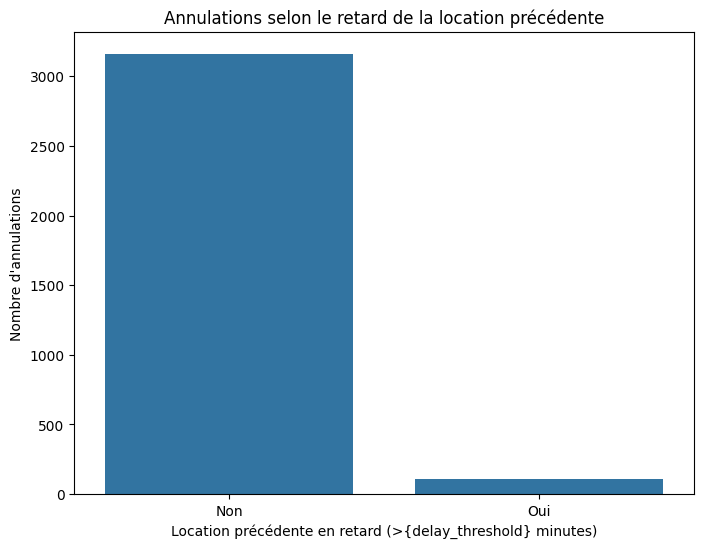

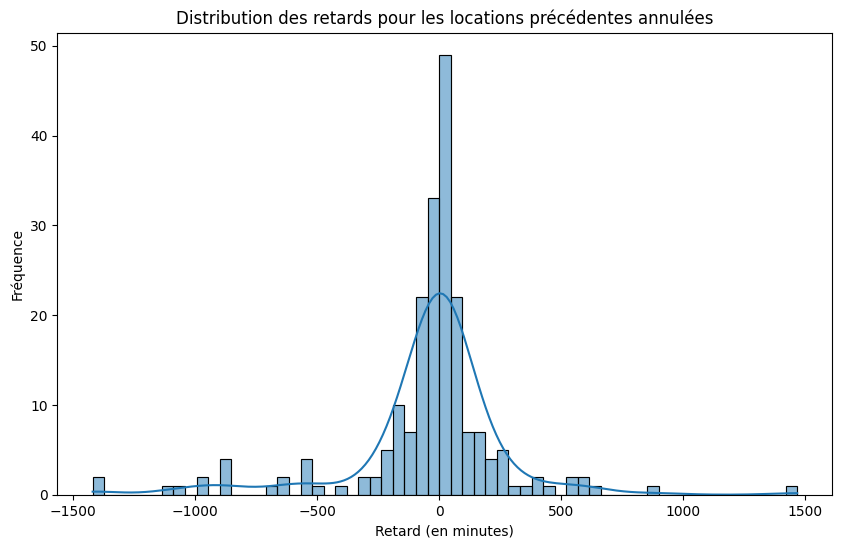

In [59]:
# Convertir les colonnes nécessaires en numérique, en gérant les erreurs
df['delay_at_checkout_in_minutes'] = pd.to_numeric(df['delay_at_checkout_in_minutes'], errors='coerce')
df['previous_ended_rental_id'] = pd.to_numeric(df['previous_ended_rental_id'], errors='coerce')
df['time_delta_with_previous_rental_in_minutes'] = pd.to_numeric(df['time_delta_with_previous_rental_in_minutes'], errors='coerce')

# Filtrer les locations annulées
canceled_rentals = df[df['state'] == 'canceled'].copy()

# Fusionner les données avec les locations précédentes pour analyser les retards
canceled_rentals = canceled_rentals.merge(
    df[['rental_id', 'delay_at_checkout_in_minutes']],
    left_on='previous_ended_rental_id',
    right_on='rental_id',
    suffixes=('_current', '_previous'),
    how='left'
)

# Définir un seuil de retard (par exemple, 60 minutes)
delay_threshold = 0

# Créer une colonne indiquant si la location précédente avait un retard important
canceled_rentals['previous_rental_delayed'] = canceled_rentals['delay_at_checkout_in_minutes_previous'] > delay_threshold

# Calculer le pourcentage d'annulations où la location précédente était en retard
percentage_delayed_previous = canceled_rentals['previous_rental_delayed'].mean() * 100

print(f"Pourcentage d'annulations où la location précédente avait un retard de plus de {delay_threshold} minutes : {percentage_delayed_previous:.2f}%")

# Visualisation
plt.figure(figsize=(8, 6))
sns.countplot(x='previous_rental_delayed', data=canceled_rentals)
plt.title('Annulations selon le retard de la location précédente')
plt.xlabel('Location précédente en retard (>{delay_threshold} minutes)')
plt.ylabel('Nombre d\'annulations')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

# Créer un histogramme des retards pour les locations précédentes annulées
plt.figure(figsize=(10, 6))
sns.histplot(canceled_rentals['delay_at_checkout_in_minutes_previous'].dropna(), kde=True)
plt.title('Distribution des retards pour les locations précédentes annulées')
plt.xlabel('Retard (en minutes)')
plt.ylabel('Fréquence')
plt.show()

In [6]:
df.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


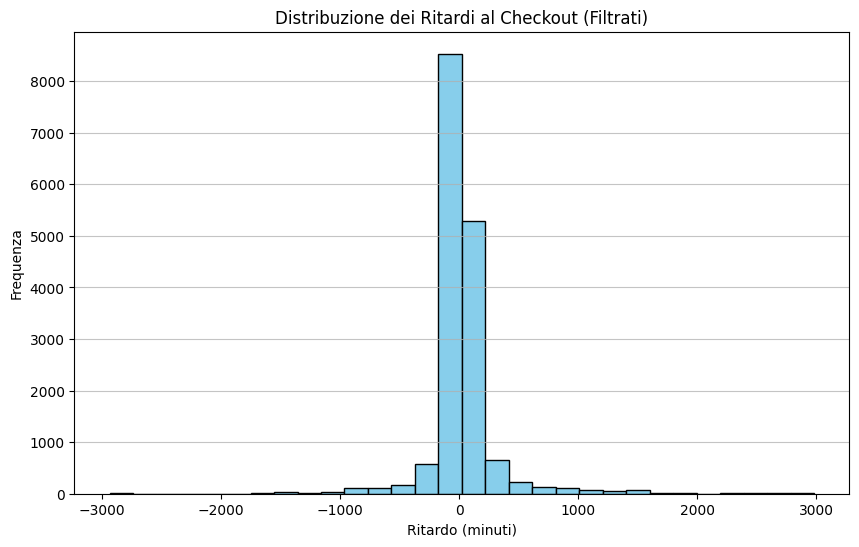

In [24]:
# Crea l'istogramma dei ritardi filtrati
plt.figure(figsize=(10, 6))
plt.hist(df_filtrato['delay_at_checkout_in_minutes'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuzione dei Ritardi al Checkout (Filtrati)')
plt.xlabel('Ritardo (minuti)')
plt.ylabel('Frequenza')
plt.grid(axis='y', alpha=0.75)
plt.show()

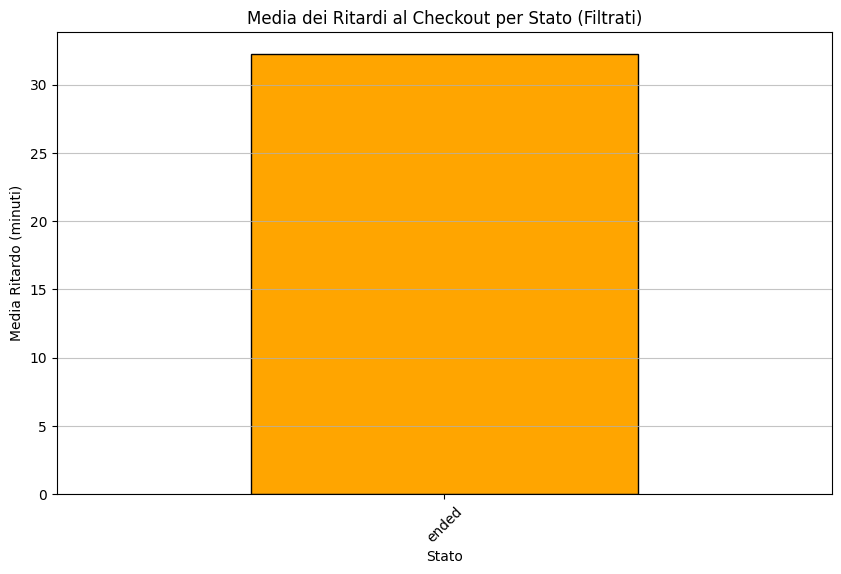

In [25]:
media_ritardi_per_stato = df_filtrato.groupby('state')['delay_at_checkout_in_minutes'].mean()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
media_ritardi_per_stato.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Media dei Ritardi al Checkout per Stato (Filtrati)')
plt.xlabel('Stato')
plt.ylabel('Media Ritardo (minuti)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [61]:
def analyze_affected_rentals(df, thresholds):
    """
    Analizza quanti noleggi sono interessati dalla funzionalità per diverse soglie di ritardo.

    Args:
        df (pd.DataFrame): DataFrame contenente i dati dei noleggi.
        thresholds (list): Lista di soglie di ritardo in minuti.

    Returns:
        pd.DataFrame: DataFrame contenente il numero di noleggi interessati per ciascuna soglia.
    """
    results = []
    for threshold in thresholds:
        # Noleggi con ritardo maggiore della soglia (in positivo)
        affected_positive = df[df['delay_at_checkout_in_minutes'] > threshold].shape[0]

        # Noleggi con ritardo minore della soglia (in negativo)
        affected_negative = df[df['delay_at_checkout_in_minutes'] < -threshold].shape[0]

        # Noleggi totali interessati (sia in positivo che in negativo)
        affected_total = df[(df['delay_at_checkout_in_minutes'] > threshold) | (df['delay_at_checkout_in_minutes'] < -threshold)].shape[0]

        results.append({
            'Threshold': threshold,
            'Affected_Positive': affected_positive,
            'Affected_Negative': affected_negative,
            'Affected_Total': affected_total
        })

    return pd.DataFrame(results)

# Definisci diverse soglie di ritardo
thresholds = [0, 15, 30, 60, 120]

# Analizza i noleggi interessati per le diverse soglie
affected_rentals_df = analyze_affected_rentals(df, thresholds)
print(affected_rentals_df)

   Threshold  Affected_Positive  Affected_Negative  Affected_Total
0          0               9404               6820           16224
1         15               7416               5342           12758
2         30               6078               4368           10446
3         60               4386               3049            7435
4        120               2553               1698            4251


In [62]:
def analyze_late_checkin_impact(df):
    """
    Analizza la frequenza con cui i conducenti sono in ritardo per il prossimo check-in e come influisce sul prossimo conducente.

    Args:
        df (pd.DataFrame): DataFrame contenente i dati dei noleggi.

    Returns:
        pd.DataFrame: DataFrame contenente le statistiche sull'impatto dei ritardi sui check-in successivi.
    """
    # Rimuovi le righe in cui 'time_delta_with_previous_rental_in_minutes' è nullo
    df_filtered = df.dropna(subset=['time_delta_with_previous_rental_in_minutes'])

    # Calcola la frequenza con cui il ritardo è maggiore del tempo disponibile per il check-in successivo
    late_frequency = df_filtered[df_filtered['delay_at_checkout_in_minutes'] > df_filtered['time_delta_with_previous_rental_in_minutes']].shape[0]
    total_cases = df_filtered.shape[0]
    late_percentage = (late_frequency / total_cases) * 100 if total_cases > 0 else 0

    results = {
        'Late_Frequency': late_frequency,
        'Total_Cases': total_cases,
        'Late_Percentage': late_percentage
    }

    return pd.DataFrame([results])

# Analizza l'impatto dei ritardi sui check-in successivi
late_checkin_impact_df = analyze_late_checkin_impact(df)
print(late_checkin_impact_df)

   Late_Frequency  Total_Cases  Late_Percentage
0             270         1841        14.665942


In [63]:
def analyze_problematic_cases_solved(df, thresholds):
    """
    Analizza quanti casi problematici risolverà la funzionalità a seconda della soglia e dell'ambito scelto.

    Args:
        df (pd.DataFrame): DataFrame contenente i dati dei noleggi.
        thresholds (list): Lista di soglie di ritardo in minuti.

    Returns:
        pd.DataFrame: DataFrame contenente il numero di casi problematici risolti per ciascuna soglia.
    """
    results = []
    for threshold in thresholds:
        # Noleggi con ritardo maggiore della soglia
        problematic_cases = df[df['delay_at_checkout_in_minutes'] > threshold].shape[0]

        results.append({
            'Threshold': threshold,
            'Problematic_Cases': problematic_cases
        })

    return pd.DataFrame(results)

# Definisci diverse soglie di ritardo
thresholds = [0, 15, 30, 60, 120]

# Analizza i casi problematici risolti per le diverse soglie
problematic_cases_solved_df = analyze_problematic_cases_solved(df, thresholds)
print(problematic_cases_solved_df)

   Threshold  Problematic_Cases
0          0               9404
1         15               7416
2         30               6078
3         60               4386
4        120               2553


In [68]:
import plotly.express as px
# Pulisci i dati: rimuovi le righe con valori mancanti nella colonna 'delay_at_checkout_in_minutes'
df_clean = df.dropna(subset=['delay_at_checkout_in_minutes'])

df_positive_delay = df_clean[df_clean['delay_at_checkout_in_minutes'] > 0]
# Calcola il ritardo medio per ogni tipo di check-in
average_delay_per_checkin = df_positive_delay.groupby('checkin_type')['delay_at_checkout_in_minutes'].mean().reset_index() 

# Crea un grafico a barre usando Plotly Express
fig = px.bar(average_delay_per_checkin, 
             x='checkin_type', 
             y='delay_at_checkout_in_minutes',
             title='Ritardo Medio al Checkout per Tipo di Check-in',
             labels={'checkin_type': 'Tipo di Check-in', 
                     'delay_at_checkout_in_minutes': 'Ritardo Medio (minuti)'},
             color='checkin_type')
fig.show()

In [64]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


2-How many rentals would be affected by the feature depending on the threshold and scope we choose?

In [29]:
# Definisci la soglia
soglia = 30  # ad esempio, 30 minuti di ritardo

# Filtra i noleggi influenzati
noleggi_influenzati = df[df['delay_at_checkout_in_minutes'] > soglia]

# Conta il numero di noleggi
numero_noleggi_influenzati = noleggi_influenzati.shape[0]
print(f"Numero di noleggi influenzati: {numero_noleggi_influenzati}")

Numero di noleggi influenzati: 6078


In [37]:
percentuale_ritardi = numero_noleggi_influenzati * 100 / len(df)
print(f"{percentuale_ritardi}%")

28.521820741435945%


In [40]:
# Definisci la soglia
soglia = 30  # ad esempio, 30 minuti di ritardo

# Filtra i noleggi influenzati
noleggi_influenzati_inf = df[df['delay_at_checkout_in_minutes'] < soglia] 

# Conta il numero di noleggi
numero_noleggi_influenzati_inf = noleggi_influenzati_inf.shape[0]
print(f"Numero di noleggi influenzati: {numero_noleggi_influenzati_inf}")

Numero di noleggi influenzati: 10196


In [41]:
percentuale_ritardi_inf = numero_noleggi_influenzati_inf * 100 / len(df)
print(f"{percentuale_ritardi_inf}%")

47.846081651806664%


In [42]:
# Definisci la soglia
soglia = 0  # ad esempio, 30 minuti di ritardo

# Filtra i noleggi influenzati
noleggi_influenzati_0 = df[df['delay_at_checkout_in_minutes'] > soglia]

# Conta il numero di noleggi
numero_noleggi_influenzati_0 = noleggi_influenzati_0.shape[0]
print(f"Numero di noleggi influenzati: {numero_noleggi_influenzati_0}")

Numero di noleggi influenzati: 9404


In [45]:
# Calcola la percentuale di conducenti in ritardo
ritardi_frequenza = df['delay_at_checkout_in_minutes'].dropna().value_counts(normalize=True) * 100

# Stampa la frequenza dei ritardi
print("Frequenza dei ritardi (in percentuale):")
print(ritardi_frequenza)

# Analizza l'impatto sul prossimo conducente (ad esempio, considerando il tempo medio di attesa)
tempo_medio_attesa = df['time_delta_with_previous_rental_in_minutes'].mean()
print(f"Tempo medio di attesa per il prossimo conducente: {tempo_medio_attesa:.2f} minuti")

Frequenza dei ritardi (in percentuale):
delay_at_checkout_in_minutes
 4.0        1.009421
 6.0        0.929891
 2.0        0.923773
 7.0        0.917656
 9.0        0.887067
              ...   
 1177.0     0.006118
-1561.0     0.006118
 14408.0    0.006118
-560.0      0.006118
-551.0      0.006118
Name: proportion, Length: 1745, dtype: float64
Tempo medio di attesa per il prossimo conducente: 279.29 minuti


In [46]:
# Definisci una soglia per i casi problematici
soglia_problemi = 15  # ad esempio, casi con ritardi superiori a 15 minuti

# Filtra i casi problematici risolti
casi_problematici_risolti = df[df['delay_at_checkout_in_minutes'] > soglia_problemi]

# Conta il numero di casi problematici risolti
numero_casi_risolti = casi_problematici_risolti.shape[0]
print(f"Numero di casi problematici risolti: {numero_casi_risolti}")

Numero di casi problematici risolti: 7416


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les graphiques (utilisation d'un style Seaborn prédefini)
sns.set_style('darkgrid')  # Utilisation du style 'darkgrid'
sns.set(font_scale=1.2)

Aperçu des données:
   Unnamed: 0 model_key  mileage  engine_power    fuel paint_color  \
0           0   Citroën   140411           100  diesel       black   
1           1   Citroën    13929           317  petrol        grey   
2           2   Citroën   183297           120  diesel       white   
3           3   Citroën   128035           135  diesel         red   
4           4   Citroën    97097           160  diesel      silver   

      car_type  private_parking_available  has_gps  has_air_conditioning  \
0  convertible                       True     True                 False   
1  convertible                       True     True                 False   
2  convertible                      False    False                 False   
3  convertible                       True     True                 False   
4  convertible                       True     True                 False   

   automatic_car  has_getaround_connect  has_speed_regulator  winter_tires  \
0          False        

c:\Users\pietr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Prix moyen par marque:
model_key
Suzuki         223.875000
Mini           204.000000
Lexus          193.000000
Maserati       188.666667
Subaru         182.340909
SEAT           181.239130
Mitsubishi     170.675325
KIA Motors     159.000000
Alfa Romeo     157.666667
Lamborghini    157.500000
Opel           155.575758
Ferrari        150.515152
Toyota         149.792453
Honda          145.000000
Porsche        144.666667
Volkswagen     134.123077
Yamaha         133.000000
Audi           130.538023
PGO            126.090909
Mercedes       121.360825
Renault        120.609170
BMW            117.432890
Nissan         111.130909
Ford           111.000000
Citroën        108.764706
Peugeot        104.917445
Fiat            93.000000
Mazda           67.000000
Name: rental_price_per_day, dtype: float64

Analyse terminée. Les graphiques ont été sauvegardés.


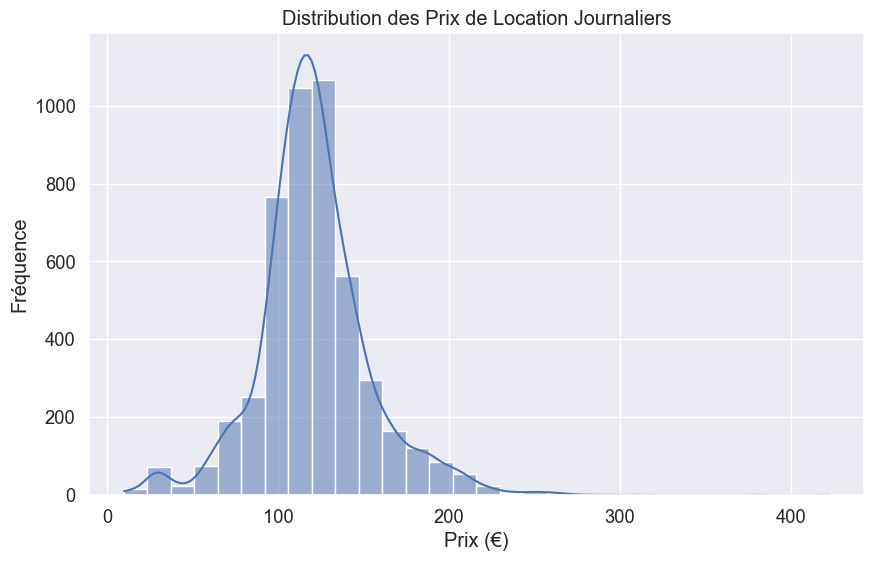

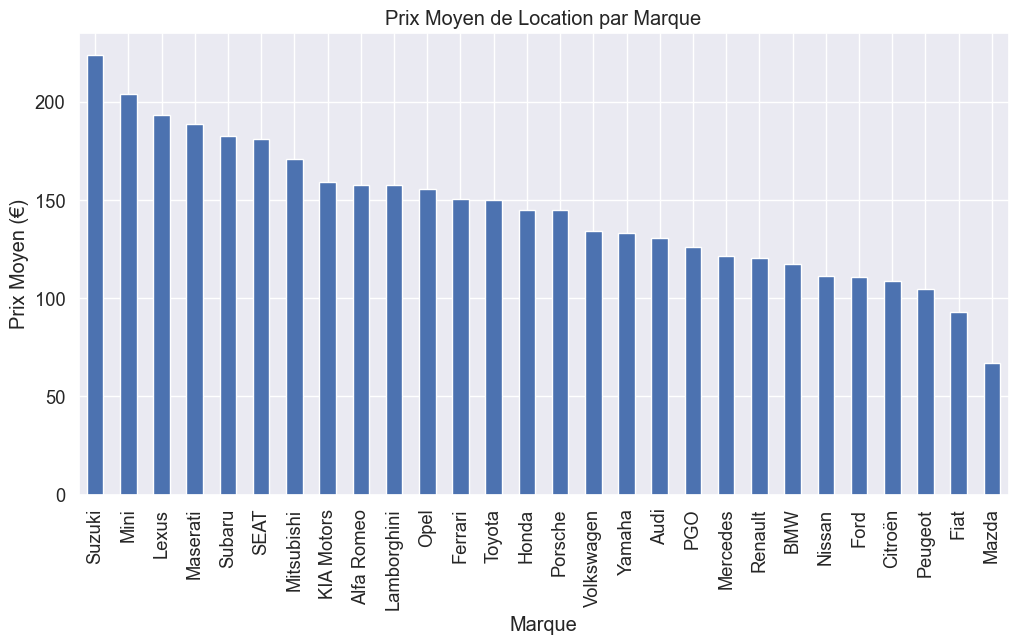

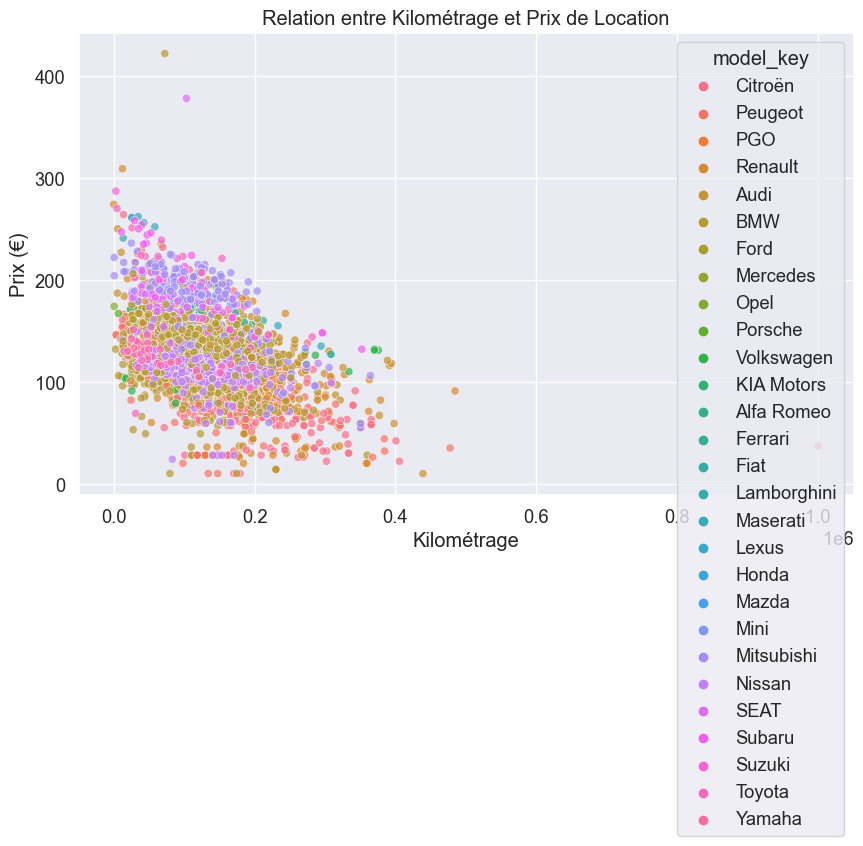

In [ ]:
donnees = pd.read_csv("get_around_pricing_project.csv", encoding="utf_8")
# Affichage des premières lignes pour comprendre la structure
print("Aperçu des données:")
print(donnees.head())

# Informations générales sur le dataset
print(donnees.info())

# Analyse des valeurs manquantes
print(donnees.isnull().sum())

# Visualisation de la distribution des prix de location
plt.figure(figsize=(10, 6))
sns.histplot(donnees["rental_price_per_day"], bins=30, kde=True)
plt.title("Distribution des Prix de Location Journaliers")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.savefig("distribution_prix.png")

# Analyse des prix moyens par marque
prix_moyen_par_marque = donnees.groupby("model_key")["rental_price_per_day"].mean().sort_values(ascending=False)
print("\nPrix moyen par marque:")
print(prix_moyen_par_marque)

# Visualisation des prix moyens par marque
plt.figure(figsize=(12, 6))
prix_moyen_par_marque.plot(kind="bar")
plt.title("Prix Moyen de Location par Marque")
plt.xlabel("Marque")
plt.ylabel("Prix Moyen (€)")
plt.savefig("prix_par_marque.png")

# Relation entre kilométrage et prix
plt.figure(figsize=(10, 6))
sns.scatterplot(data=donnees, x="mileage", y="rental_price_per_day", hue="model_key", alpha=0.7)
plt.title("Relation entre Kilométrage et Prix de Location")
plt.xlabel("Kilométrage")
plt.ylabel("Prix (€)")
plt.savefig("kilometrage_vs_prix.png")

print("\nAnalyse terminée. Les graphiques ont été sauvegardés.")